<h2>Principal Components - Introduction</h2>

In [57]:
library(ISLR)

In [58]:
states = row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [59]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

<h6> apply function </h6> - can run a function either columnwise (parameter - 2) or rowwise (parameter - 1)

In [60]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [61]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

** prcomp function ** - calculates principal components

return Value:
* **x** - the the principal component matrix computed from the input matrix and the loadings in rotation variable 
* center - the mean
* scale -  the SD of the input features
* SD - the SD of the principal components
* rotation - the principal component loadings (the PHI values to transform a list of input variables to a new principal component variable)

In [62]:
pr.out = prcomp(USArrests, scale=TRUE)

In [63]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

We find that there are 4 principal components returned by the prcomp function. <br/> min(n-1, p) principal components are possible, where n is the number of records and p is the number of features

In [64]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [65]:
dim(pr.out$x)

[1] 50  4

In [66]:
head(pr.out$x)

,PC1,PC2,PC3,PC4
Alabama,-0.9756604,1.1220012,-0.43980366,0.154696581
Alaska,-1.9305379,1.0624269,2.01950027,-0.434175454
Arizona,-1.7454429,-0.7384595,0.05423025,-0.826264240
Arkansas,0.1399989,1.1085423,0.11342217,-0.180973554
California,-2.4986128,-1.5274267,0.59254100,-0.338559240
Colorado,-1.4993407,-0.9776297,1.08400162,0.001450164


**PCA plot** shows that on the principal component PC1, all 3 variables Assault, Rape and Murder contain similar loadings. This can be seen in the 'rotation' values too.

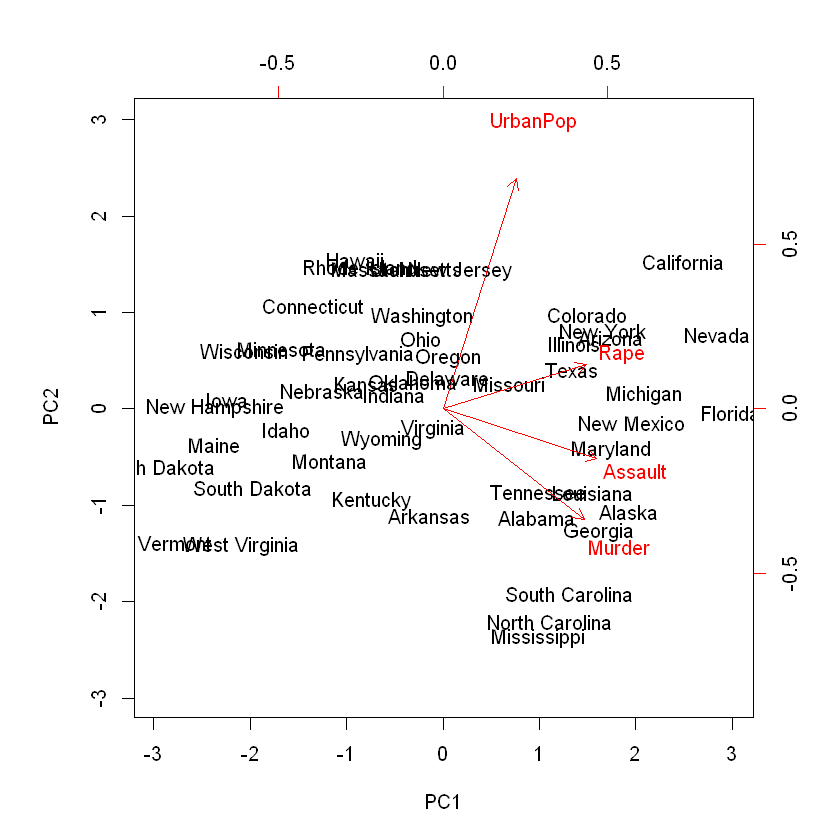

In [67]:
# simply inverting the components so that the graph matches the one in the ISLR book
pr.out$rotation = -pr.out$rotation
pr.out$x = -pr.out$x

biplot(pr.out, scale=0)

In [68]:
pr.out$sd
pr.var = pr.out$sd^2
pr.var # provides the variance explained by the Principal component

[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

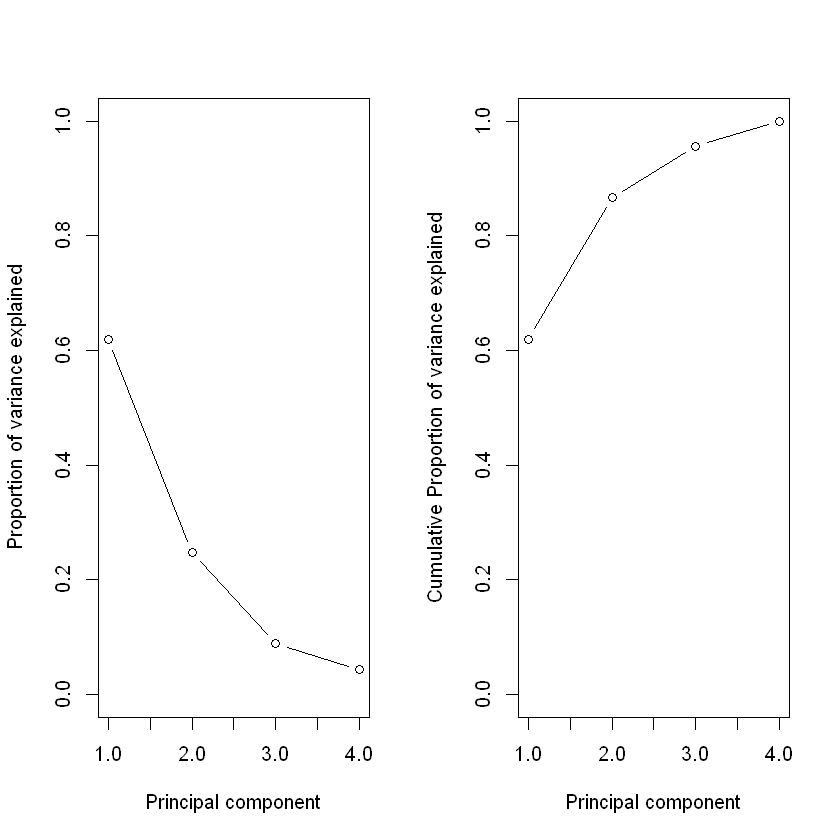

In [69]:
#pve-proportion of variance explained
pve = pr.var/sum(pr.var)

par(mfrow = c(1,2))
plot(pve, xlab="Principal component", ylab="Proportion of variance explained", ylim=c(0,1), type='b')
plot(cumsum(pve), xlab="Principal component", ylab="Cumulative Proportion of variance explained", ylim=c(0,1), type='b')

<h2>Principal component analysis on Genomic data</h2>

In [70]:
nci.labs = NCI60$labs #labels
nci.data = NCI60$data #features

length(nci.labs)
dim(nci.data)

[1] 64

[1]   64 6830

In [71]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

In [72]:
pr.out = prcomp(nci.data, scale=TRUE)

In [73]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [74]:
pr.var = pr.out$sd^2
pr.var # provides the variance explained by the Principal component

[1] 7.758157e+02 4.614486e+02 3.928508e+02 2.901080e+02 2.550986e+02
 [6] 2.471524e+02 2.094230e+02 1.834472e+02 1.727647e+02 1.622718e+02
[11] 1.609529e+02 1.478095e+02 1.399534e+02 1.351533e+02 1.308230e+02
[16] 1.210113e+02 1.135644e+02 1.100148e+02 1.088930e+02 1.065424e+02
[21] 1.029429e+02 1.010908e+02 9.806257e+01 9.307726e+01 9.039519e+01
[26] 8.709610e+01 8.599223e+01 8.262894e+01 8.066147e+01 7.656305e+01
[31] 7.395349e+01 7.135815e+01 7.010794e+01 6.749915e+01 6.654176e+01
[36] 6.359512e+01 6.248052e+01 6.117227e+01 5.962252e+01 5.754792e+01
[41] 5.559482e+01 5.393991e+01 5.047377e+01 4.918294e+01 4.841912e+01
[46] 4.714560e+01 4.634123e+01 4.419098e+01 4.377236e+01 4.106152e+01
[51] 3.868639e+01 3.848041e+01 3.680928e+01 3.502331e+01 3.495568e+01
[56] 3.289465e+01 2.994946e+01 2.800683e+01 2.521219e+01 2.193966e+01
[61] 1.743625e+01 1.666371e+01 1.633165e+01 1.530027e-28

In [75]:
Cols = function(vec){
    cols = rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

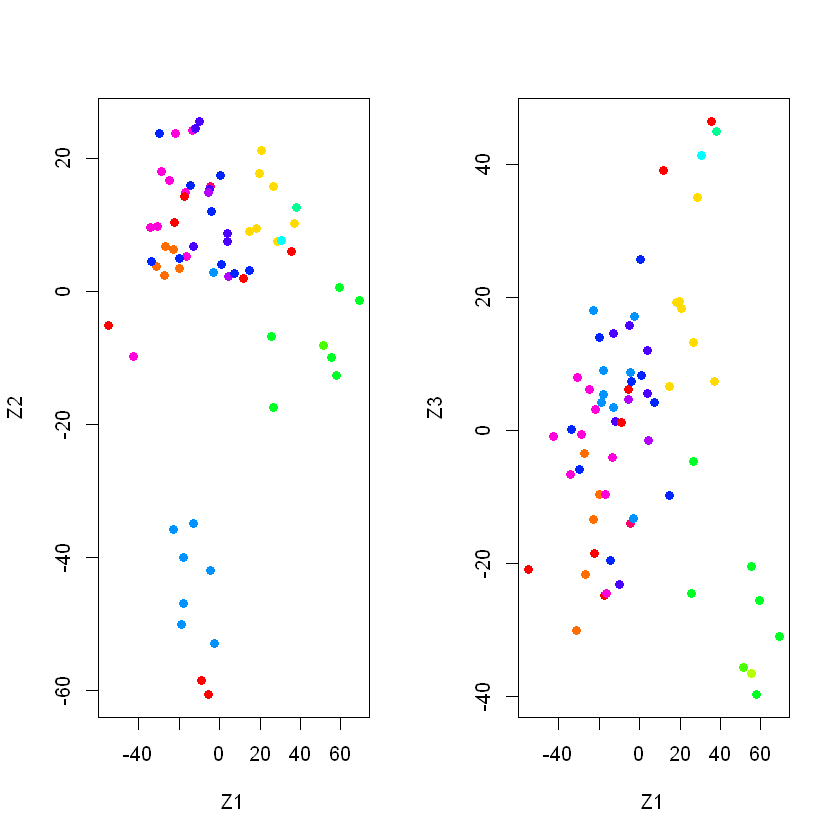

In [76]:
# Below plots show that, records with similar cancer types, tend to have similar values on the first few principal components
par(mfrow = c(1,2))
plot(pr.out$x[,1:2], col = Cols(nci.labs), pch=19, xlab="Z1", ylab="Z2")
plot(pr.out$x[,c(1, 3)], col = Cols(nci.labs), pch=19, xlab="Z1", ylab="Z3")

In [77]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

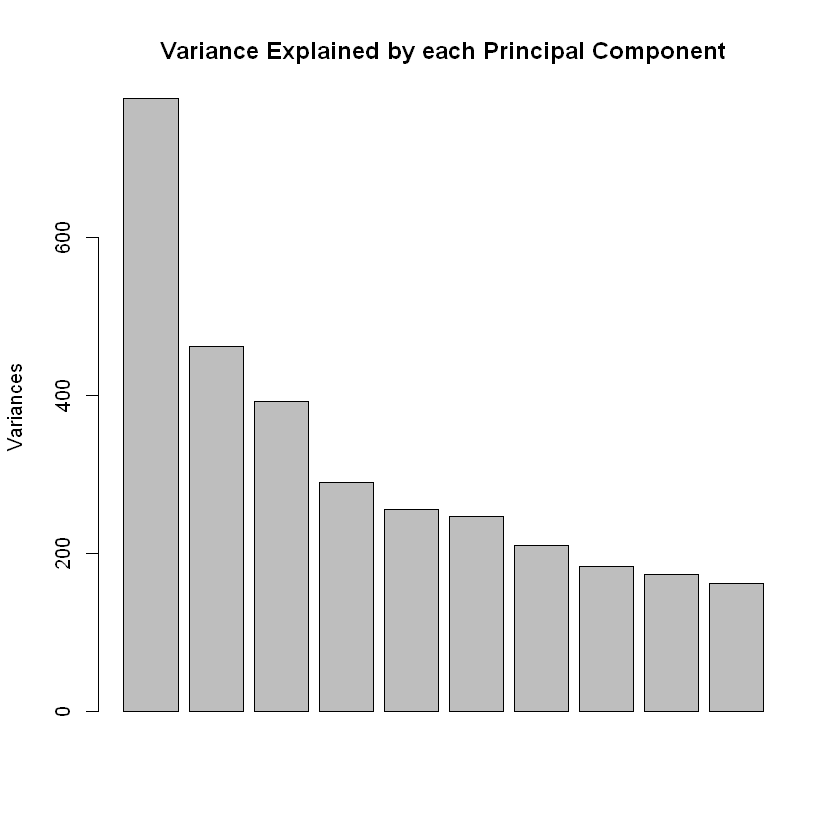

In [78]:
plot(pr.out, main="Variance Explained by each Principal Component")

In [79]:
pve = (pr.out$sd ^ 2)/sum((pr.out$sd ^ 2))

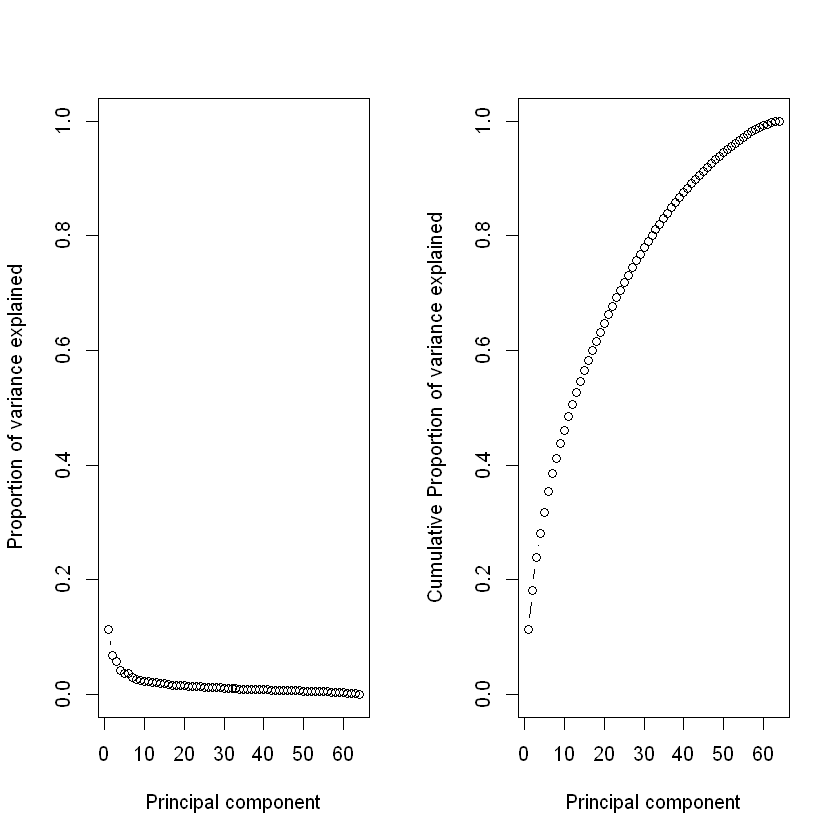

In [80]:
par(mfrow = c(1,2))
plot(pve, xlab="Principal component", ylab="Proportion of variance explained", ylim=c(0,1), type='b')
plot(cumsum(pve), xlab="Principal component", ylab="Cumulative Proportion of variance explained", ylim=c(0,1), type='b')